###  목표
. 타이타닉 데이터를 학습해서 생존자/사망자 예측하기

. 머신러닝 전체과정을 정리해보자

### 머신러닝 과정
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델선택 및 하이퍼 파라미터 조정
6. 모델 학습
7. 모델 평가
8. 서비스화

### 1. 문제 정의
- 탑승객의 정보를 바탕으로 생존자/사망자 분류 (지도학습, 분류)
- kaggle 에서 좋은 점수를 획득하기

###  2. 데이터 수집
. kaggle 사이트에서 다운

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 시각화 라이브러리
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# pessenger id  삭제
train = train.drop('PassengerId',axis = 1)

In [6]:
test = test.drop('PassengerId',axis = 1)

### 3. 데이터 전처리
- 컬럼 삭제
- 결측치 채우기 
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기

In [7]:
y_train = train["Survived"]

In [8]:
# 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Embarked 결측치 채우기


In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Glynn, Miss. Mary Agatha",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# fillna 함수 활용하여 embarked 속성의 결측치 'S' 값으로 채우기
train["Embarked"].fillna("S",inplace = True)

In [12]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
test['Fare'].fillna(14.454200,inplace = True)

In [15]:
#age 칼럼 채우기
# 특성간의 상관관계를 통해서 채우기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
train[['Pclass','Age']].groupby(by='Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [17]:
age_table = train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [18]:
age_table.loc[(2,'female'),'Age']

28.0

In [19]:
age_table.loc[3,'male']

Age    25.0
Name: (3, male), dtype: float64

In [20]:
def fill_age(person):
    if np.isnan(person["Age"]):
        return age_table.loc[person['Pclass'],person['Sex']][0]
    else:
        return person['Age']

In [21]:
train['Age'] = train.apply(fill_age,axis=1)
test['Age'] = test.apply(fill_age,axis=1)

###  cabin(선실) 채우기
- 결측치를 하나의 데이터로 활용해보자.
- Cabin의 범주가 너무 많기 때문에 종류를 줄여보자(모델의 과대적합 방지)

In [22]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
train['Cabin'].str[0]
# cabin을 문자열로 바꾼 뒤 , 첫번째 열만 받아오기

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [24]:
train['Cabin'] = train['Cabin'].str[0] 

In [25]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
train['Cabin'].fillna('M', inplace = True)

In [27]:
test['Cabin']= test['Cabin'].str[0]

In [28]:
test['Cabin'].fillna('M',inplace = True)

In [29]:
train['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

####  4. 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 탐색을 한다

#####  범주형 데이터 시각화
-빈도 기반의 bar chart를 자주 활용함

<AxesSubplot:xlabel='Cabin', ylabel='count'>

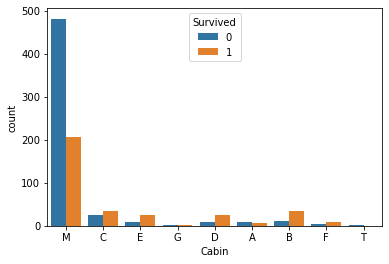

In [30]:
# cabin 시각화(survived추가)
sns.countplot(data = train,
             x = 'Cabin',
             hue = 'Survived')

##### - M에서 상대적으로 많은 사람이 죽었다는 걸 알 수있음, 모델에 학습시켜도 의미가 있을 수 있음

#####  Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

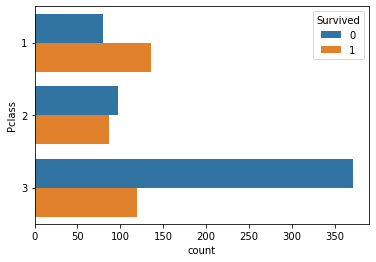

In [31]:
sns.countplot(data = train,
             y = 'Pclass',
             hue = 'Survived')

#####  
- 1등급의 생존율이 가장 높음
- 3등급의 사망율이 가장 높음
- 모델에게 사용 가능

#### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

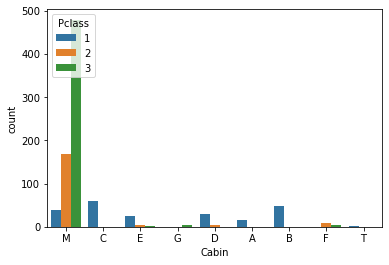

In [32]:
sns.countplot(data = train,
             x = 'Cabin',
             hue = 'Pclass')

##### 
- A,B,C 는 1등급 승객만 이용할 수 있었음
- M 에는 3등급이 많이 속해 있었던 걸 알 수 있었음 <- 3등급 사람이 많이 죽어서 정보가 손실될 가능성이 높음

#####  Embarked(탑승위치), Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

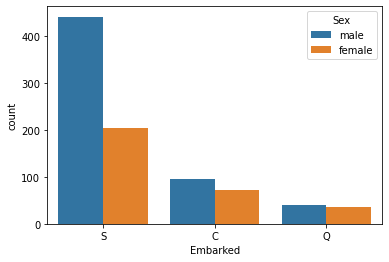

In [33]:
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Sex')

##### 
- S라는 곳에 인파가 몰린걸 봐선 3등급 사람들이 많이 탔을 가능성이 높음
- S는 연인이 아닌 사람들이 많이 탔을 가능성이 높음.기회주의
- Q는 연인이 많이 탔을 가능성이 높음
- 하지만 밑에 비교 결과에서 바뀜

<AxesSubplot:xlabel='Embarked', ylabel='count'>

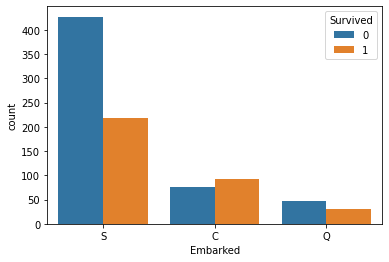

In [34]:
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')

##### 
- 시각화만 보고 판단하지말고 위와 비교해서 본다면 내용이 아에 다를 수 있음

<AxesSubplot:xlabel='Sex', ylabel='count'>

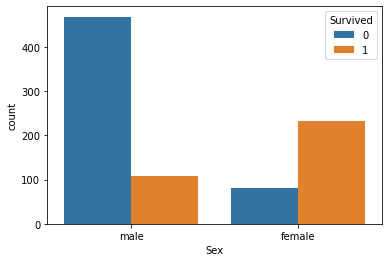

In [35]:
sns.countplot(data = train,
             x = 'Sex',
             hue = 'Survived')

#####  당연히 남자보다 여자가 생존률이 높음

###  수치형 데이터
- ex) 키와 몸무게 (변동값이 크다)
- 구간을 나누어 종합하는 히스토그램
- 커널(밀도를 나타 낼 도형) 밀도 추정 그래프(데이터가 많이 겹치면 그 부분이 높아짐))

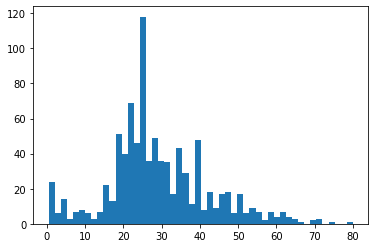

In [36]:
# bins = 구간
plt.hist(train['Age'],bins=50)
plt.show()

#####  Age 시각화

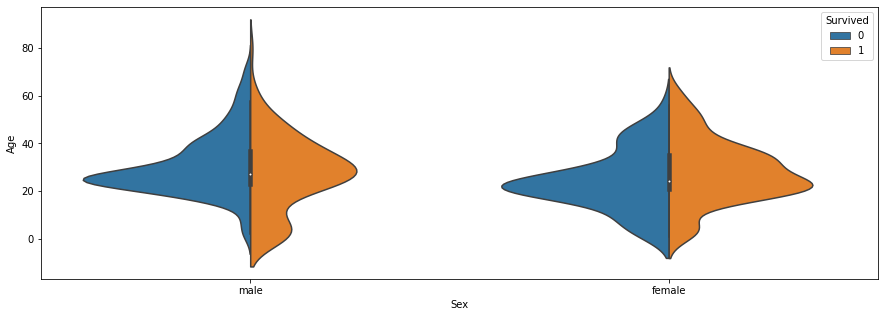

In [37]:
# figsize = 도화지 크기
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              y= 'Age',
              x='Sex',
              hue = 'Survived',
              split=True)
plt.show()

#####  
- 남자는 20대가 약간 많이 사망
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했음(시대적인 배경)

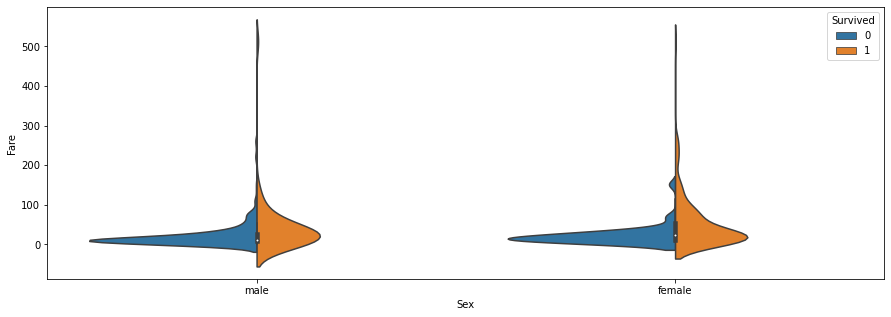

In [38]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              y= 'Fare',
              x='Sex', 
              hue = 'Survived',
              split=True)
plt.show()

##### 
- 요금이 싼 사람들은 상대적으로 많이 죽었다.
- 전체 요금이 0~40달러 사이에 많이 분포함

#####  특성공학
- SibSp와 Parch 를 합쳐서 가족이라는 새로운 컬럼 생성

In [39]:
train['Family_Size'] = train['SibSp'] + train['Parch'] +1
test['Family_Size'] = test['SibSp'] + test['Parch'] +1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

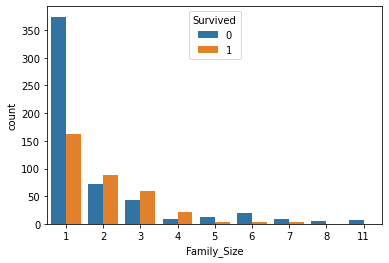

In [40]:
sns.countplot(data = train,
             x = 'Family_Size',
             hue = 'Survived')

##### 특성공학
- text 데이터 다루기(비정형 데이터)
- Name 컬럼 : 중간에 호칭을 뽑아서 정형화 시키자.

In [41]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [42]:
def split_title(row):
    pass

In [43]:
train['Name'].apply(split_title)

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Name, Length: 891, dtype: object

#####  
- 1명 일때는 죽은 비율이 높다.
- 2~4명 일때는 산 비율이 높다.
- 5명 이상 일때는 죽은 비율이 높다.
- Family_Size라는 수치 데이터를 그대로 써도 좋지만, 범주형 데이터로 변환해보자
- Binning(수치형 -> 범주형) : 사소한 관찰 요류를 줄여준다.(모델의 단순화 유도)

##### 특성공학 
- Family_Group 만들기 
- Alone, Small, Large 범주로 변경하자
- cut 함수 활용

In [44]:
bins = [0,1,4,20] # 데이터를 잘라낼 구간정보
labels = ["Alone","Small","Large"] # 구간별 범주이름
train['Family_Group']= pd.cut(x = train['Family_Size'],bins = bins,labels = labels)

In [45]:
bins = [0,1,4,20] # 데이터를 잘라낼 구간정보
labels = ["Alone","Small","Large"] # 구간별 범주이름
test['Family_Group']= pd.cut(x = test['Family_Size'],bins = bins,labels = labels)

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

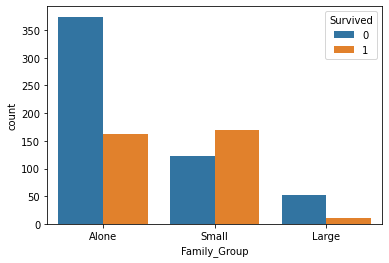

In [46]:
sns.countplot(data=train,x='Family_Group',hue="Survived")

##### 
모델이 복잡하다면 Family_Group으로 단순화
모델이 단순하다면 Family_size 로 복잡화 시켜주기

In [47]:
train.loc[:,'Sex'][train['Sex'] == 'male']=1
train.loc[:,'Sex'][train['Sex'] == 'female']=2

<ipython-input-47-a9e21de71969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,'Sex'][train['Sex'] == 'male']=1
<ipython-input-47-a9e21de71969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,'Sex'][train['Sex'] == 'female']=2


In [48]:
test.loc[:,'Sex'][test['Sex'] == 'male']=1
test.loc[:,'Sex'][test['Sex'] == 'female']=2

<ipython-input-48-b6799e75150f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'Sex'][test['Sex'] == 'male']=1
<ipython-input-48-b6799e75150f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'Sex'][test['Sex'] == 'female']=2


In [49]:
train['Sex'] == 'male'

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [50]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [51]:
train['Title']=train['Name'].apply(split_title)

In [52]:
test['Title']=train['Name'].apply(split_title)

In [53]:
# 정형화 Title 종류 확인해보기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

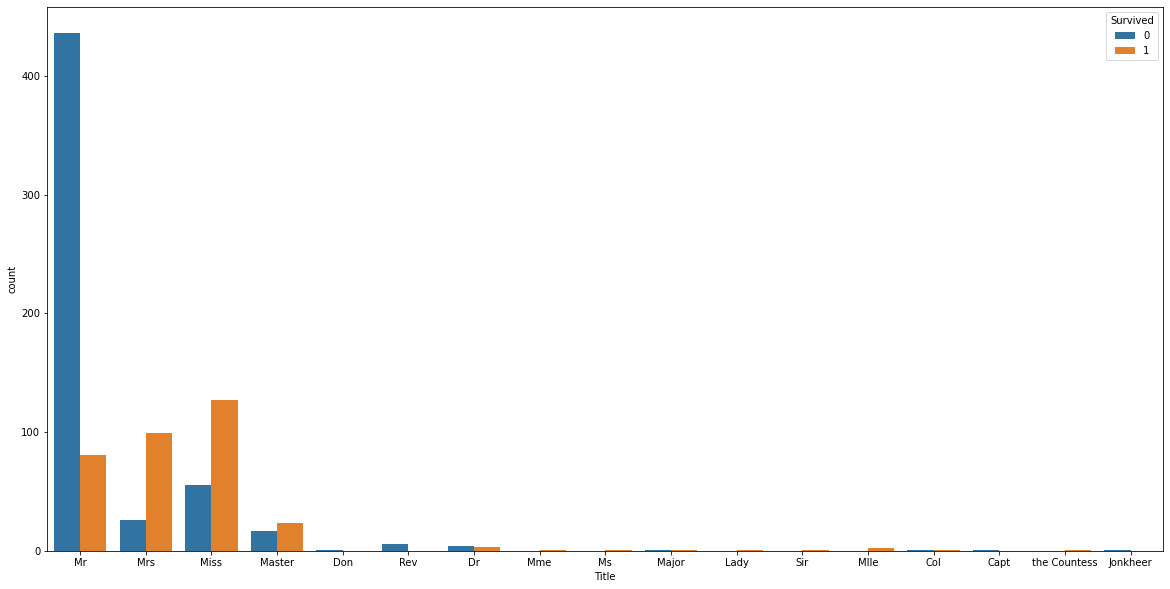

In [54]:
plt.figure(figsize=(20,10),facecolor='w')
sns.countplot(data=train,
             x = 'Title',
             hue = 'Survived')

(0.0, 20.0)

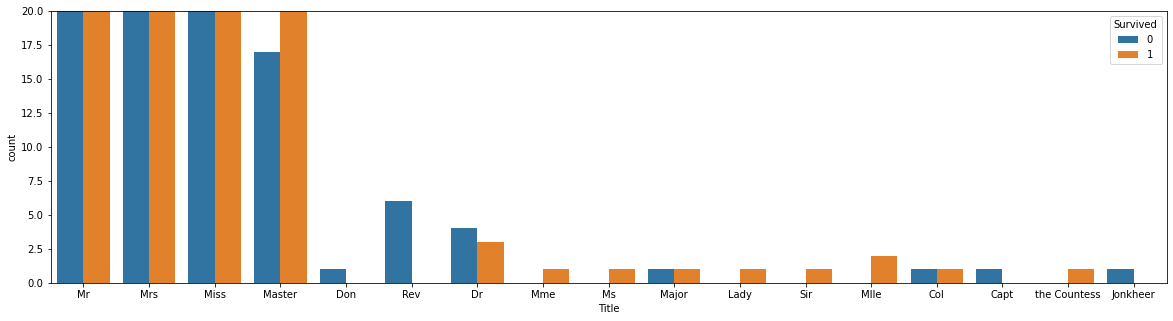

In [55]:
plt.figure(figsize =(20,5)) # 가로, 세로
sns.countplot(data=train,
             x= 'Title',
             hue = 'Survived')
plt.ylim(0,20)

##### 
- Mr, Mrs,Miss : 성별과 관련된 호칭이라 머신러닝 모델이 학습에 쓸 수 있을
    것 같다.
- Master: 나이가 어린 남성을 부르는 호칭
- 나머지 호칭들은 인원수가 적고 종류가 많기 때문에 범주를 통합 시킬 필요가 있다.

In [56]:
# map 함수 사용하기
title_dic={
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Mme' : 'Miss',
    'Lady' : 'Miss',
    'Don' : 'Other',
    'Rev' : 'Other',
    'Dr' : 'Other',
    'Ms' : 'Miss',
    'Major' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other'
}

In [57]:
train['Title2']=train['Title'].map(title_dic)

In [58]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [59]:

test['Title2']=test['Title'].map(title_dic)

In [60]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [61]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [62]:
train.drop(['Name','Ticket','Title'],axis=1, inplace=True)

In [63]:
test.drop(['Name','Ticket','Title'],axis=1, inplace=True)

#####  5. 모델링
- 인코딩(문자형태의 데이터를 숫자형태의 데이터로 변환)
    1.label encoding
    2.one-hot encoding
- 모델선택 및 하이퍼 파라미터 조정
- 모델학습
- 모델평가


#####  Label Encoding -> 단순 수치 값으로 mapping 하는 작업

In [64]:
categorical_features = ['Sex','Cabin','Embarked','Family_Group','Title2']

In [65]:
pd.get_dummies(train['Title2']) #원 핫 인코딩

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [66]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name],prefix=feature_name)#원 핫 인코딩
    train.drop(feature_name, axis = 1,inplace=True)#기존 글자형태 컬럼 삭제
    train = pd.concat([train,one_hot],axis=1)# 기존 데이터S에 위에 핫 데이터를 붙이기

In [67]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_1,Sex_2,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22.0,1,0,7.2500,2,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,2,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
888,0,3,21.5,1,2,23.4500,4,0,1,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,26.0,0,0,30.0000,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [68]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name],prefix=feature_name)#원 핫 인코딩
    test.drop(feature_name, axis = 1,inplace=True)#기존 글자형태 컬럼 삭제
    test = pd.concat([test,one_hot],axis=1)# 기존 데이터S에 위에 핫 데이터를 붙이기

In [69]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_1,Sex_2,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,34.5,0,0,7.8292,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,2,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,3,27.0,0,0,8.6625,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,3,22.0,1,1,12.2875,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [70]:
test['Cabin_T'] =0

In [71]:
#집합을 활용
set(train.columns)-set(test.columns)

{'Survived'}

In [72]:
X_train = train.drop('Survived',axis = 1) 
Y_train = train['Survived']

In [73]:
X_train.shape,Y_train.shape

((891, 28), (891,))

In [74]:
X_test = test
# Y_train 은 kaggle 사이트에 있다. 

In [75]:
X_test.shape

(418, 28)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [78]:
from sklearn.model_selection import train_test_split

#####  train, validation 분리

In [79]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train)

#####  모델 학습 및 평가

In [80]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [81]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [82]:
knn_model.score(X_val,Y_val)

0.7354260089686099

In [83]:
tree_model.score(X_val,Y_val)

0.7488789237668162

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
X_train = train.drop('Survived',axis = 1) 
Y_train = train['Survived']

In [86]:
knn_result = cross_val_score(knn_model,X_train,Y_train, cv=5)

In [87]:
knn_result.mean()

0.7261942125415856

In [88]:
tree_result = cross_val_score(tree_model,X_train,Y_train,cv=5)
tree_result

array([0.77653631, 0.7752809 , 0.85393258, 0.75280899, 0.78089888])

In [89]:
tree_result.mean()

0.7878915322327538

##### 하이퍼 파라미터 튜닝

In [90]:
score_list = []
for k in range(1,150) : # 이웃이 작으면 복잡 크면 단순
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model,X_train,Y_train, cv=5)
    score_list.append(knn_result.mean())
    

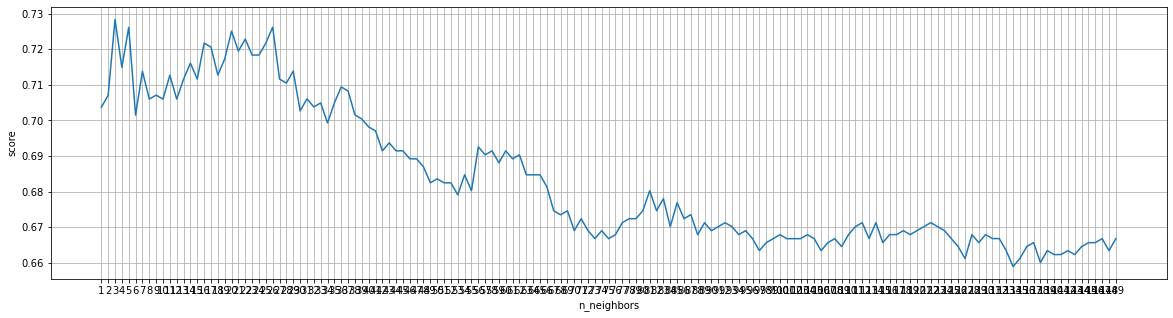

In [91]:
plt.figure(figsize=(20,5))
plt.plot(range(1,150),score_list)
plt.xticks(range(1,150))
plt.xlabel('n_neighbors')
plt.grid()
plt.ylabel('score')
plt.show()

In [92]:
final_tree = DecisionTreeClassifier

In [93]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train,Y_train)

final_tree= DecisionTreeClassifier(max_depth=4)
final_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [94]:
X_test = X_test[X_train.columns]

In [95]:
knn_pre = final_knn.predict(X_test)
tree_pre = final_tree.predict(X_test)

In [96]:
knn_pre

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [97]:
tree_pre

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [98]:
subimssion = pd.read_csv("gender_submission.csv")
subimssion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
subimssion['Survived'] = tree_pre

In [100]:
subimssion.to_csv('tree_submission01.csv',index=False)

#####  성능 개선을 위해 고려해 볼 사항

##### 
1. feature selection(특성 선택)
2. 데이터 확보
3. 전처리 작업 변경(결측치, 특성공학, 스케일 등)
4. 모델 변경 - 앙상블 모델(여러 모델을 합침)

In [101]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [102]:
forest.fit(X_train,Y_train)

RandomForestClassifier()

In [103]:
forest.score(X_val,Y_val)

0.9820627802690582

In [104]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train,Y_train)
final_knn.score(X_train,Y_train)

0.8484848484848485

In [105]:
final_tree = DecisionTreeClassifier(max_depth=4)
final_tree.fit(X_train,Y_train)
final_tree.score(X_train,Y_train)

0.8451178451178452

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()

In [116]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'max_depth':[5,10,15,20],
    'n_estimators':[100,150,200,250],
    'max_features':[0.5,0.7],
    'max_leaf_nodes':[20,50,80]
}

In [123]:
# 사용할 모델
# 매개변수 그리드
# 교차검증 폴드수
grid = GridSearchCV(RFC,param_grid,cv = 3)

In [124]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'max_leaf_nodes': [20, 50, 80],
                         'n_estimators': [100, 150, 200, 250]})

In [125]:
grid.best_score_

0.8383838383838383

In [126]:
grid.best_params_

{'max_depth': 5,
 'max_features': 0.7,
 'max_leaf_nodes': 20,
 'n_estimators': 250}

In [132]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [133]:
df_train = pd.DataFrame(train)
df_test= pd.DataFrame(test)

In [137]:
df_train = df_train.drop('Survived',axis = 1)

In [140]:
df = pd.concat([df_train,df_test])

In [141]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [142]:
df_final = df.iloc[:,[0,1,2,6,7]]

In [143]:
df_final

,PassengerId,Pclass,Name,Parch,Ticket
0,1,3,"Braund, Mr. Owen Harris",0,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599
2,3,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803
4,5,3,"Allen, Mr. William Henry",0,373450
...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,A.5. 3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,PC 17758
415,1307,3,"Saether, Mr. Simon Sivertsen",0,SOTON/O.Q. 3101262
416,1308,3,"Ware, Mr. Frederick",0,359309
